Error in <TList::Delete>: A list is accessing an object (0x853ea40) already deleted (list name = TList)
Error in <TList::Delete>: A list is accessing an object (0x887e6d0) already deleted (list name = TList)
Error in <TList::Delete>: A list is accessing an object (0x88859f0) already deleted (list name = TList)
Error in <TList::Delete>: A list is accessing an object (0x832f170) already deleted (list name = TList)
Error in <TList::Delete>: A list is accessing an object (0x8458f30) already deleted (list name = TList)


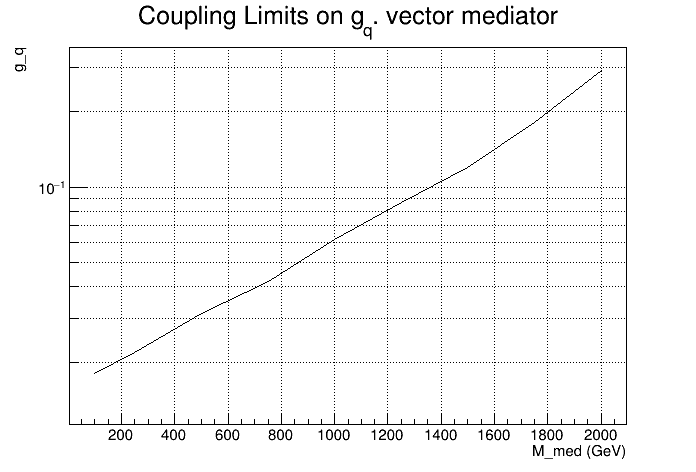

In [12]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TGraphAsymmErrors, TMultiGraph
from ROOT import gBenchmark, gStyle, gROOT
c1 = TCanvas('c1','HEPdata canvas',200,10,700,500)
gBenchmark.Start('d1')
#
# Connect ROOT histogram/d demonstration file
f1 = TFile('HEPData.root')

# Change default style for the statistics box
gStyle.SetStatW(0.30)
gStyle.SetStatH(0.20)
gStyle.SetStatColor(42)
#
# Display a function of one directory column imposing a condition
# on another column.
c1.cd()
c1.SetGrid()
c1.SetLogy()
c1.GetFrame().SetFillColor(15)
d = gROOT.FindObject('Coupling limits on g_{q}, vector mediator')

gr1 = d.Get('Graph1D_y1')
#gr2 = d.Get('Graph1D_y2')
#gr3 = d.Get('Graph1D_y3')
#gr4 = d.Get('Graph1D_y4')
#gr5 = d.Get('Graph1D_y5')
#gr6 = d.Get('Graph1D_y6')

mg = TMultiGraph()



mg.Add(gr1)


mg.SetTitle("Coupling Limits on g_{q}. vector mediator;M_med (GeV);g_q")
mg.Draw("ALP")

c1.Draw()
c1.Update()

c1.SaveAs('HEPDataOut.pdf');